In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [49]:
ROCK, PAPER, SCISSORS = 0,1,2
regretSum = np.array([0.0, 0.0, 0.0])
mixedStrat = np.array([0.0, 0.0, 0.0])
mixedStratSum = np.array([0.0, 0.0, 0.0])
oppStrat = np.array([0.4, 0.3, 0.3])

In [50]:
# All possible payoffs
def value(p1, p2):
    if p1 == p2:
        return 0 
    if p1 == ROCK and p2 == SCISSORS:
        return 1
    if p1 == SCISSORS and p2 == PAPER:
        return 1
    if p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1
    

In [51]:
def getStrategy():
    global regretSum, strategySum
    strategy = np.maximum(regretSum, 0)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(3)/3
    return strategy

def getAction(strategy):
    # Returns a random number in (0,1)
    rr = random.random()
    
    return np.searchsorted(np.cumsum(strategy), rr)


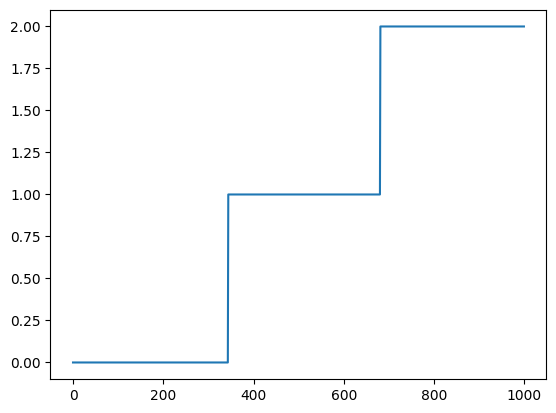

In [52]:
a = [getAction(getStrategy()) for i in range(1000)]

plt.plot(sorted(a))

In [66]:
vv = 0 
for i in range(100):
#Get regret-matched mixed-strategy actions
    myStrat = getStrategy()
    myAction = getAction(myStrat)
    oppAction = getAction(oppStrat)
    vv += value(myAction, oppAction)
vv

3